In [4]:
# Preamble

## Matplotlib Configuration
import matplotlib.pyplot as plt
%matplotlib inline
%precision 1
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
set_matplotlib_formats('png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

## Other Crap
import numpy as np
import scipy as sp
import sympy as sym
from instrumental import Q_, u
import sys
import h5py
#matplotlib.rc('text', usetex=True)
#matplotlib.rc('xtick', labelsize=16) 
#matplotlib.rc('ytick', labelsize=16)
#matplotlib.rcParams.update({'axes.labelsize': 20,'axes.titlesize': 20,'axes.facecolor': '0.9','font.size': 14 })
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,bm}"]
np.set_printoptions(precision=3)
%precision %.3g
import  matplotlib.cm as cm
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import trapz, cumtrapz
from matplotlib.colors import  ListedColormap, LogNorm, Normalize, BoundaryNorm
import matplotlib.patches as patches
from scipy.optimize import minimize_scalar
from scipy.signal import square
from os import path
from datetime import datetime
import time
fig_dir = '/Users/doddgray/Google Drive/figs'
data_dir = '/Volumes/USB20FD/sweep3_mat'
import sympy as sy
from time import sleep
#import RII_db_tools as rii
#rii.RII_db_dir = '/Users/doddgray/Google Drive/notebooks/RII_db'
import warnings
warnings.filterwarnings('ignore') # set back to 'default' to see warnings again.
#warnings.filterwarnings('default')
colors = ['r','b','g','m','c','k','orange','purple']
from instrumental import instrument, list_instruments, list_visa_instruments
from glob import glob
#from instrumental.optics.optical_elements import Mirror, Lens, Space, Interface
#import instrumental.optics.beam_tools as bt
#import instrumental.optics.beam_plotting as bp
import os
# add MATLAB's parula colormap because it's nice

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
plt.register_cmap(cmap=parula)
# define lowest common multiple function for use in Herriott cell modeling
import fractions
def lcm(a,b): return abs(a * b) / fractions.gcd(a,b) if a and b else 0

# functions for twiny plotting (dual unit x axes sharing ticks)
def lm2f_tickfn(X):
    X_lm = X * u.nm
    X_f = (u.speed_of_light / X_lm ).to(u.THz).m
    return ["%3.3f" % z for z in X_f]

def lm2f_tickfn_offset(X,offset):
    X_lm = X * u.nm
    offset_lm = offset * u.nm
    X_f_GHz = (u.speed_of_light / X_lm ).to(u.GHz).m
    offset_f_GHz = (u.speed_of_light / offset_lm ).to(u.GHz).m
    offset_f_THz = (u.speed_of_light / offset_lm ).to(u.THz).m
    X_offset_GHz = X_f_GHz - offset_f_GHz
    return "{:3.3f}".format(offset_f_THz), ["%3.1f" % z for z in X_offset_GHz]

def f2lm_tickfn(X):
    X_f = X * u.THz
    X_lm = (u.speed_of_light / X_f ).to(u.nm).m
    return ["%4.3f" % z for z in X_lm]

def lm2f_twiny(ax):
    ax2=ax.twiny()
    ticks = ax.get_xticks()
    ax2.set_xticks(ticks)
    ax2.set_xbound(ax.get_xbound())
    ax2.set_xticklabels(lm2f_tickfn(ticks))
    ax2.set_xlabel('frequency [THz]')
    return ax2

def lm2f_twiny_offset(ax,offset=None):
    ax2=ax.twiny()
    ticks = ax.get_xticks()
    ax2.set_xticks(ticks)
    ax2.set_xbound(ax.get_xbound())
    if offset is None:
        offset = np.median(ticks)
    offset_THz_str, tick_str_list = lm2f_tickfn_offset(ticks,offset)
    ax2.set_xticklabels(tick_str_list)
    ax2.set_xlabel('frequency [GHz] offset from ' + offset_THz_str + ' THz')
    return ax2



def f2lm_twiny(ax):
    ax2=ax.twiny()
    ticks = ax.get_xticks()
    ax2.set_xticks(ticks)
    ax2.set_xbound(ax.get_xbound())
    ax2.set_xticklabels(f2lm_tickfn(ticks))
    ax2.set_xlabel('wavelength [nm]')
    return ax2

# Define data load functions

In [26]:
# define data load functions

# lab computer dirs
# scope_data_dir = 'C:/Users/Lab/Google Drive/data/'
# agilent_data_dir = 'C:/Users/Lab/agilent_scope_data'

# mac laptop dirs
scope_data_dir = '/Users/doddgray/Google Drive/data'
agilent_data_dir = '/Users/doddgray/Box Sync/IMEC Kerr Free Carrier Rings/agilent_scope_data'

# load data from tek scope

def load_scope_trace(name='',data_dir=scope_data_dir,latest_file=True,verbose=False):
    if latest_file:
        file_list =  glob(path.normpath(data_dir)+path.normpath('/Tektronix_MSO_scope_trace_' + name + '_*'))
        latest_file = max(file_list,key=path.getctime)
        if verbose:
            print_statusline('Loading ' + name +' trace from file: ' + path.basename(path.normpath(latest_file)))
        data = np.load(latest_file)
    else:
        fpath = path.normpath(path.join(data_dir,name))
        if verbose:
            print_statusline('Loading ' + name +' trace from file: ' + path.basename(fpath))
        data = np.load(fpath)
    t = data[:,0] * u.second
    V = data[:,1] * u.volt
    return t,V

# load data from Agilent 6GHz scope
## warning! these are large arrays, probably good to process them one at a time and and then delete the variables to avoid 
## memory leaks

def load_agilent_trace(name='',data_dir=agilent_data_dir,verbose=False):
    file_list =  glob(path.normpath(data_dir)+path.normpath('/Agilent_54855A_scope_trace_' + name + '_*'))
    latest_file = max(file_list,key=path.getctime)
    if verbose:
        print_statusline('Loading ' + name +' trace from file: ' + path.basename(path.normpath(latest_file)))
    with h5py.File(latest_file, 'r') as f:
        t0 = f['t0'][0] * u.second
        dt = f['dt'][0] * u.second
        V = f['V'][:] * u.volt
    nt = len(V)
    t = np.linspace(t0,t0+nt*dt,nt) * u.second
    return t,V


# Lorentzian fitting

## DFB tuning data

In [29]:
# load DFB trace with 10GHz siedbands

## use 'data 2'
#t_T_bg,V_T_bg = load_scope_trace(name='IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_relative_transmission_bg_2')
bg2_fname = 'Tektronix_MSO_scope_trace_IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_relative_transmission_bg_2_2018_04_24_13_15_54.npy'
t_T_bg,V_T_bg = load_scope_trace(name=bg2_fname,latest_file=False)
t_T,V_T = load_scope_trace(name='IMECV1_wb2_dev1_0V_10uW_CW_DFB_sweep_relative_transmission_2')
t_ipd,V_ipd = load_scope_trace(name='IMECV1_wb2_dev1_0V_10uW_CW_DFB_sweep_internal_photodiode_2')
t_mod,V_mod = load_scope_trace(name='IMECV1_wb2_dev1_0V_10uW_CW_DFB_sweep_modulation_voltage_2')

## use 'data 1'
# 109uW input at fiber couple
# 20dBm 10GHz power adding sidebands via EO modulation, EO DC bias is +10V
# 200x SRS gain
# 0V reverse bias on cavity's lateral diode
# 4x averaging on scope

# t_T_bg,V_T_bg = load_scope_trace(name='IMECV1_wb2_dev1_0V_52uW_CW_DFB_sweep_relative_transmission_bg1')
# t_T,V_T = load_scope_trace(name='IMECV1_wb2_dev1_0V_100uW_CW_DFB_sweep_relative_transmission_1')
# t_ipd,V_ipd = load_scope_trace(name='IMECV1_wb2_dev1_0V_100uW_CW_DFB_sweep_internal_photodiode_1')
# t_mod,V_mod = load_scope_trace(name='IMECV1_wb2_dev1_0V_100uW_CW_DFB_sweep_modulation_voltage_1')


## use 'data 3'

# 10uW input at fiber couple
# 20dBm 10GHz power adding sidebands via EO modulation, EO DC bias is +10V
# 500x SRS gain
# 15V reverse bias on cavity's lateral diode
# 32x averaging on scope

# t_T_bg,V_T_bg = load_scope_trace(name='IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_relative_transmission_bg_2')
# t_T,V_T = load_scope_trace(name='IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_relative_transmission_3')
# t_ipd,V_ipd = load_scope_trace(name='IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_internal_photodiode_3')
# t_mod,V_mod = load_scope_trace(name='IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_modulation_voltage_3')


## use 'data 4'

# 300uW input at fiber couple
# 20dBm 10GHz power adding sidebands via EO modulation, EO DC bias is +10V
# 100x SRS gain
# 15V reverse bias on cavity's lateral diode
# no averaging

# t_T_bg,V_T_bg = load_scope_trace(name='IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_relative_transmission_bg_4')
# t_T,V_T = load_scope_trace(name='IMECV1_wb2_dev1_15V_300uW_CW_DFB_sweep_relative_transmission_4')
# t_ipd,V_ipd = load_scope_trace(name='IMECV1_wb2_dev1_15V_300uW_CW_DFB_sweep_internal_photodiode_4')
# t_mod,V_mod = load_scope_trace(name='IMECV1_wb2_dev1_15V_300uW_CW_DFB_sweep_modulation_voltage_4')



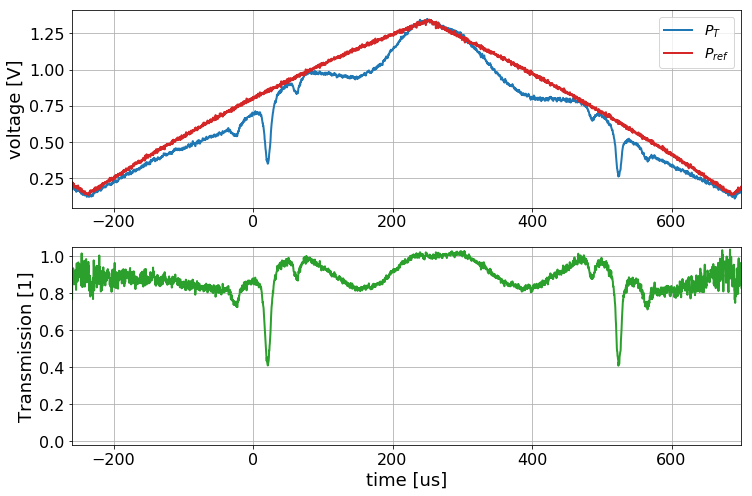

In [30]:
# plot tuning data

data_skip = 20
ipd_T_ratio = (V_T[::10]-np.mean(V_T_bg)).max()/V_ipd[::10].max()
T_rel = (V_T-np.mean(V_T_bg))/V_ipd/ipd_T_ratio
fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

ax0.plot(t_T[::data_skip].to(u.us),V_T[::data_skip]-np.mean(V_T_bg),'C0',label='$P_T$')
ax0.plot(t_ipd[::data_skip].to(u.us),V_ipd[::data_skip]*ipd_T_ratio,'C3',label='$P_{ref}$')
ax0.set_xlim([-260,700])
#ax0.set_ylim([-0.001,0.02])
ax0.grid()
ax0.legend()

ax0.set_ylabel('voltage [V]')


ax1.plot(t_T[::data_skip].to(u.us),T_rel[::data_skip],color='C2',label='100$\mu$W,$V_{RB}$=15V')
ax1.set_xlim([-260,700])
ax1.set_ylim([-0.02,1.05])
ax1.grid()

ax1.set_xlabel('time [us]')
ax1.set_ylabel('Transmission [1]')

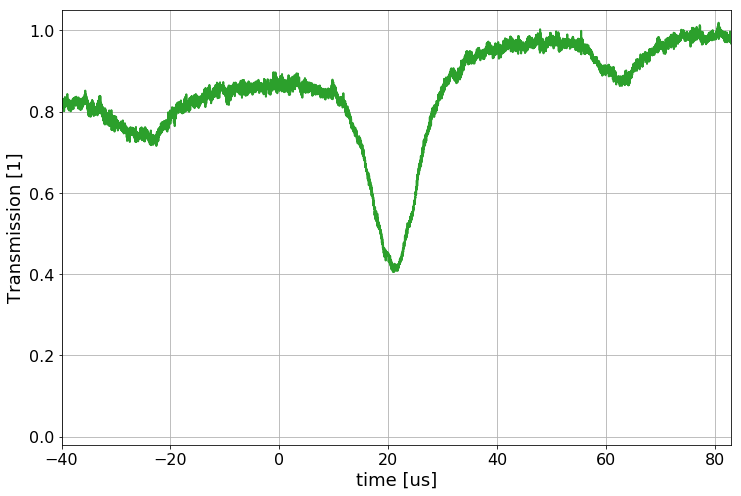

In [31]:
data_skip = 1
fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)
ax0.plot(t_T[::data_skip].to(u.us),T_rel[::data_skip],color='C2',label='100$\mu$W,$V_{RB}$=15V')
ax0.set_xlim([-40,83])
ax0.set_ylim([-0.02,1.05])
ax0.grid()

ax0.set_xlabel('time [us]')
ax0.set_ylabel('Transmission [1]')

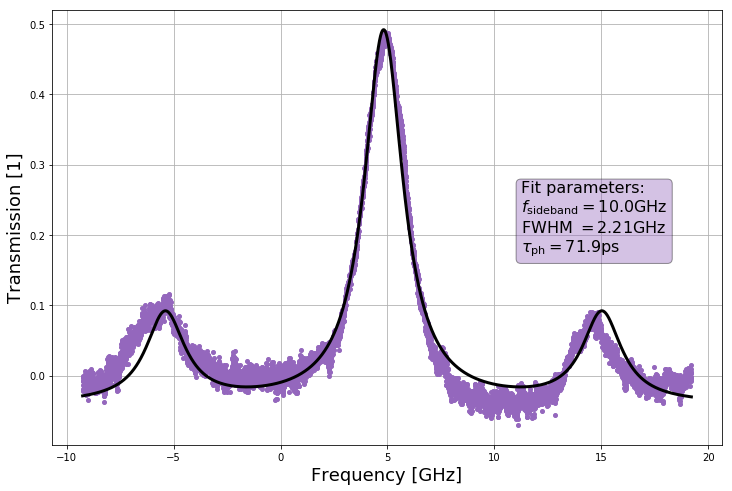

In [60]:
# process trace by fitting to triple Lorentzian
from cavity_trace_fitting import lorentzian, triple_lorentzian

EOM_freq = 10 * u.GHz
# linear fit parameters (taken by hand for now)
a = -1.42e-3/u.us
b = 0.136


T_rel_lim = 1 - T_rel[t_T<83.0*u.us]
t_T_lim = t_T[t_T<83.0*u.us]
T_rel_lim = T_rel_lim[t_T_lim>-40.0*u.us]
t_T_lim = t_T_lim[t_T_lim>-40.0*u.us]
T_rel_lim_corr = T_rel_lim - a * t_T_lim - b # remove afine background to make T_rel ~ 0 away from lorentzians

# fit parameters attained using Nate's code via an ipython session in a terminal:

params = {'A0': Q_(0.530925040118, 'dimensionless'),
              'B0': Q_(0.127577109513, 'dimensionless'),
              'FWHM': Q_(2212.15988845, 'megahertz'),
              'dnu': Q_(10.2092101522, 'gigahertz'),
              'nu0': Q_(4.82039573452, 'gigahertz'),
              'y0': Q_(-0.042015987444, 'dimensionless')} 

scale_factor_x = Q_(231479.988062, 'gigahertz / second')
scale_factor_y = 1 / u.volt
data_x = t_T_lim.to(u.s)
data_y = T_rel_lim_corr*u.volt

nu = data_x * scale_factor_x
amp = data_y * scale_factor_y

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)
ax0.plot(nu, amp, '.',color='C4',label='data')
ax0.plot(nu, triple_lorentzian(nu, **params), '-',color='k',linewidth=3,label='fit')
ax0.grid()
ax0.set_xlabel('Frequency [GHz]')
ax0.set_ylabel('Transmission [1]')

tau_ph = (1 / (2 * np.pi * params['FWHM'].to(u.GHz))).to(u.ps)

### add text box with fit properties 
title_str = 'Fit parameters:\n'
f_sb_str = '$f_\mathrm{sideband} = %3.1f \mathrm{GHz}$\n'%(EOM_freq.to(u.GHz).m)
f_fwhm_str = 'FWHM $= %3.2f \mathrm{GHz}$\n'%(params['FWHM'].to(u.GHz).m)
tau_ph_str = r'$\tau_\mathrm{ph} = %3.1f \mathrm{ps}$'%(tau_ph.to(u.ps).m)
val_str = f_sb_str + f_fwhm_str + tau_ph_str
text_str = title_str + val_str

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='C4', alpha=0.4)

# place a text box in upper left in axes coords
ax0.text(0.7, 0.6 ,text_str, transform=ax0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

In [45]:
fwhm_t = 8 * u.us
scan_rate = 10 * u.GHz / (26 * u.us)
fwhm_f = (fwhm_t * scan_rate).to(u.GHz)
fwhm_f

<Quantity(3.076923076923077, 'gigahertz')>

# Prototype data analysis on one dataset

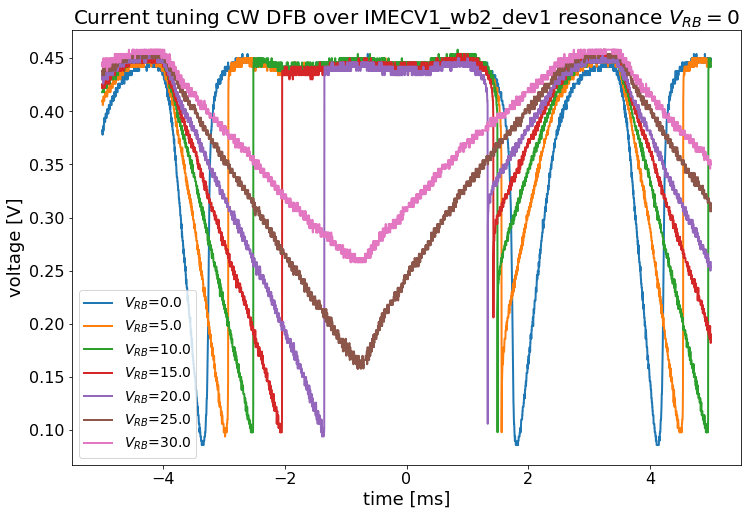

In [8]:
# load and plot data collected with Vrb_sweep (no fast scope traces)

# def Vrb_sweep(Vrb_list,set_name,set_dir='C:/Users/Lab/agilent_scope_data'):
#     for Vind, VV in enumerate(Vrb_list):
#         if (VV.to(u.volt).m < 40.0):
#             xhr_write(VV)
#         else:
#             raise Exception('attempted to write voltage above 40V to XHR')
#         sleep(1)
#         scope.stop_acquire()
#         # collect Tek scope traces
#         collect_scope_trace(channel=1,name='Vrb{:2.1f}_tek_ch1_P_trans_slow'.format(VV.m),data_dir=set_dir,return_data=False)
#         collect_scope_trace(channel=2,name='Vrb{:2.1f}_tek_ch2_P_ref'.format(VV.m),data_dir=set_dir,return_data=False)
#         collect_scope_trace(channel=3,name='Vrb{:2.1f}_tek_ch3_Vmod'.format(VV.m),data_dir=set_dir,return_data=False)
#         collect_scope_trace(channel=4,name='Vrb{:2.1f}_tek_ch4_I_TPA'.format(VV.m),data_dir=set_dir,return_data=False)
#         scope.run_acquire()

set_name ='Pf_10mW'
data_dir ='C:/Users/Lab/agilent_scope_data/'
Vmin = 0 * u.volt
Vmax = 30 * u.volt
nV = 7
#delay_list = [-1.25*u.ms,1.05*u.ms,1.35*u.ms,1.95*u.ms,2.8*u.ms]
Vrb_list = np.linspace(Vmin.to(u.volt).m,Vmax.to(u.volt).m,nV) * u.volt
set_dir = os.path.join(data_dir,set_name)


data_skip = 30
# ipd_T_ratio = (V_T_0[::10]-np.mean(V_T_bg)).max()/V_ipd_0[::10].max()

# ipd_T_ratio_2 = (V_T_2[::10]-np.mean(V_T_bg_2)).max()/V_ipd_2[::10].max()

#ref_scale=8
#laser_scale = 1
#plt.rcParams['axes.titlepad'] = 60 
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#ax.plot(t_T_0[::10].to(u.us),V_T_0[::10]-np.mean(V_T_bg),'C0',label='Dev1 wg transmission')
#ax.plot(t_ipd_0[::10].to(u.us),V_ipd_0[::10]*ipd_T_ratio,'C3',label='laser power')

#ax.plot(t_T_2[::10].to(u.us),V_T_2[::10]-np.mean(V_T_bg_2),'C0',label='Dev1 wg transmission')
#ax.plot(t_ipd_2[::10].to(u.us),V_ipd_2[::10]*ipd_T_ratio_2,'C3',label='laser power')
#ax.plot(t_mod_0[::10],V_mod_0[::10],'C4',label='modulation signal')

#ax.set_xlim([1544,1550])
#ax.set_ylim([-0.001,0.02])
ax.grid()
ax.legend()
ax.set_xlabel('time [us]')
ax.set_ylabel('voltage [V]')

ax.set_title('Current tuning CW DFB over IMECV1_wb2_dev1 resonance $V_{RB}=0$')

for Vind, VV in enumerate(Vrb_list):
    name_Pref='Vrb{:2.1f}_tek_ch2_P_ref'.format(VV.m)
    name_Pt='Vrb{:2.1f}_tek_ch1_P_trans_slow'.format(VV.m)
    t_Pt, V_Pt = load_scope_trace(data_dir=set_dir,name=name_Pt)
    ax.plot(t_Pt[::data_skip].to(u.ms),V_Pt[::data_skip],label='$V_{RB}$='+'{:2.1f}'.format(VV.m))
    
ax.grid()
ax.legend()
ax.set_xlabel('time [ms]')
ax.set_ylabel('voltage [V]')


# Conditions for Sustained Free Carrier Oscillations

## Without Feedback

First let's consider models for combined free carrier and thermal dynamics from previous papers. Two good references are <cite data-cite="506115/L3WRQ9MF"></cite> and <cite data-cite="506115/VKMHWK6P"></cite>. From the Soltani paper we find the following model for thermal and free carrier effects and associated conditions for sustained free carrier oscillation.

### Model and definitions
![](soltani_eq_1.png)
![](soltani_eq_3.png)

subject to the following definitions:

![](soltani_eq_2.png)
![](soltani_eq_4.png)
![](soltani_delta_lm_def.png)
![](soltani_Gfca_def.png)

"In this analysis, an amplitude $a (S_{in})$ and phase $φ_a (φ_{in})$ are designated to the resonator mode (input waveguide mode). The resonator (waveguide) mode is normalized such that the squared magnitude of $a (S_{in})$ represents the resonator energy $U$ (waveguide input power $P_{in}$)...$ω_0$ is the resonator cold resonance frequency; $κ$ is the waveguide-resonator coupling constant, which is related to the waveguide-resonator coupling $Q$ ($Q_e$) as $|κ|^2 = ω_0 /Q_e$ (without lack of generality we assume that κ is real); $P_{out}$ is the waveguide output power; $δω_L$ is the detuning of the laser frequency from the resonator cold frequency (i.e. $δω_L = ω_{Laser} − ω_0$); $\Delta ω_0$ is the resonance shift of the resonator mainly due to refractive index change induced by thermo-optic ($\Delta n|θ = A_{th}θ$, $A_{th} = 1.84 × 10^{−4} K^{−1}$, $θ$ is temperature) and FC dispersion ($\Delta n_{|FC}$)...$Q_L$ is the loaded $Q$ of the resonator, which is composed of three parts: (1)$Q_0$, (2) $Q_e$ and (3) the nonlinear contribution which includes $Q_{TPA}$ and $Q_{FC}$...$\tau_{FC}$ is the free carrier lifetime; $\tau_{th}$ and $K$ are the thermal lifetime and thermal conductance of the resonator, respectively...



Condtions for free carrier ("fast") oscillation and thermal+free carrier self pulsing ("slow oscillation") are found to be

### Free Carrier ("Fast") Oscillation Condition
![](soltani_eq_6.png)

### Thermal+Free Carrier self-pulsing ("Slow Oscillation") Condition
![](soltani_eq_7.png)


for sustained free carrier oscillations we want (6) above to be true and (7) to be false. Note that $G_{TPA}$ and $G_{FCA}$ above should really both be $G_{FCA}$. I'm pretty confident this is just a typo based on the supplemental, where $G_{TPA}$ appears in the same equations and positions as $G_{FCA}$ in the paper, although is not defined. Bleh.



In [24]:
# define, calculate and report model parameter values

lm_0 = 1550 * u.nm
f_0 = lm_0.to(u.THz,'sp')
omega_0 = 2 * np.pi * f_0
E_ph = (u.planck_constant * f_0).to(u.joule)
n_g = 3.97 # from experiment, 600GHz FSR for 40um diameter ring
v_g = (u.speed_of_light / n_g).to(u.cm/u.second)
diameter = 40 * u.um
circumfrence = np.pi * diameter
A_eff = 0.1 * u.um**2 # not calculated, taken from Ryan's JLT paper
V_eff = (circumfrence * A_eff).to(u.um**3)
tau_fc = 30 * u.picosecond # a guess for now
f_fwhm = 2.21 * u.GHz
omega_fwhm = 2 * np.pi * f_fwhm
tau_ph = (1.0 / omega_fwhm).to(u.ps)



####### Ryan's normalized coefficients at 1.55um ############
gamma = 3.1e-9 * u.cm / u.watt # 2 \pi n_2 / \lambda
r = 0.189  # \beta \lambda / ( 4 \pi n_2 ) = beta / ( 2 * gamma )
#############################################################
beta = r * 2 * gamma 
G = ( beta / ( 2 * E_ph ) * ( v_g / V_eff )**2 ).to(1/u.cm**3/u.second/u.joule**2) # rate of change (by TPA) of e-h pair density per square Joule in mode
dn_dN = (-1.73e-27 / u.meter**3).to(1/u.cm**3) # from Soref via Johnson/Painter, probably averaged over e and h

print('lm_0: {:4.1f} nm'.format(lm_0.m))
print('f_0: {:3.1f} THz'.format(f_0.m))
print('E_ph: {:3.3g} J'.format(E_ph.m))
print('v_g: {:3.2g} cm/s'.format(v_g.m))
print('V_eff: {:3.3g} um^3'.format(V_eff.m))
print('tau_fc: {:4.1f} ps'.format(tau_fc.m))
print('tau_ph: {:4.1f} ps'.format(tau_ph.m))
print('tau_fc/tau_ph: {:2.3f}'.format((tau_fc/tau_ph).to(u.dimensionless).m))
print('beta: {:3.2g} cm/watt'.format(beta.m))
print('G: {:3.2g} cm^(-3) s^(-1) J^(-2)'.format(G.m))

lm_0: 1550.0 nm
f_0: 193.4 THz
E_ph: 1.28e-19 J
v_g: 7.6e+09 cm/s
V_eff: 12.6 um^3
tau_fc: 30.0 ps
tau_ph: 53.1 ps
tau_fc/tau_ph: 0.565
beta: 1.2e-09 cm/watt
G: 1.7e+51 cm^(-3) s^(-1) J^(-2)


### Model Parameter Values

| Parameter [unit] | Value   | Reference |
|------|------|------|
|   $\omega_0$ [2$\pi\cdot$THz]  | $2\pi\cdot${{f_0.m}} |   expt.   |

## With Feedback

<div class="cite2c-biblio"></div>